<a href="https://colab.research.google.com/github/pavankumarchowdary35/NLP-projects/blob/main/Zero_shot_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2024-01-24 17:29:53--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  --.-KB/s    in 0.06s   

2024-01-24 17:29:54 (81.1 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [2]:
!pip install transformers

In [3]:
from transformers import pipeline

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import textwrap

from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [4]:
classifier = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [5]:
classifier("This is a great movie", candidate_labels=["positive", "negative"])

{'sequence': 'This is a great movie',
 'labels': ['positive', 'negative'],
 'scores': [0.9969461560249329, 0.0030538279097527266]}

In [6]:
text = "Due to the presence of isoforms of its components, there are 12 " + \
  "versions of AMPK in mammals, each of which can have different tissue " + \
  "localizations, and different functions under different conditions. " + \
  "AMPK is regulated allosterically and by post-translational " + \
  "modification, which work together."
classifier(text, candidate_labels=["biology", "math", "geology"])

{'sequence': 'Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, each of which can have different tissue localizations, and different functions under different conditions. AMPK is regulated allosterically and by post-translational modification, which work together.',
 'labels': ['biology', 'math', 'geology'],
 'scores': [0.8908600211143494, 0.06606590747833252, 0.04307400435209274]}

In [7]:
df = pd.read_csv('bbc_text_cls.csv')

In [8]:
len(df)

2225

In [12]:
df.sample(5).head()

,text,labels
952,England children's tsar appointed\n\nThe first...,politics
869,Lopez misses UK charity premiere\n\nJennifer L...,entertainment
874,Tarantino to direct CSI episode\n\nFilm direct...,entertainment
346,India-Pakistan peace boosts trade\n\nCalmer re...,business
1106,Top judge clashes with ministers\n\nThe UK's t...,politics


In [13]:
labels = list(set(df['labels']))

In [14]:
labels

['business', 'entertainment', 'politics', 'sport', 'tech']

In [15]:
df.iloc[1024]['text']

'UK troops on Ivory Coast standby\n\nDowning Street has confirmed British troops are on standby in case they need to help evacuate several hundred UK citizens from Ivory Coast.\n\nThe news came as it emerged France had begun evacuating its hostages after days of anti-French demonstrations. Trouble flared after nine French peacekeepers were killed and President Jacques Chirac ordered the destruction of the Ivory Coast\'s air force. A company of 100-120 UK troops is understood to have been put on standby. They are ready to fly out and secure the route from the embassy to the airport if called upon. Prime Minister Tony Blair\'s official spokesman said: "There are British nationals in Ivory Coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further, but that\'s all I can say at this stage."\n\nHe added the situation would be monitored carefully in case evacuation became necessary. France has played a lead role in international peacekee

In [16]:
df.iloc[1024]['labels']

'politics'

In [19]:
classifier(df.iloc[1024]['text'], candidate_labels = labels)

{'sequence': 'UK troops on Ivory Coast standby\n\nDowning Street has confirmed British troops are on standby in case they need to help evacuate several hundred UK citizens from Ivory Coast.\n\nThe news came as it emerged France had begun evacuating its hostages after days of anti-French demonstrations. Trouble flared after nine French peacekeepers were killed and President Jacques Chirac ordered the destruction of the Ivory Coast\'s air force. A company of 100-120 UK troops is understood to have been put on standby. They are ready to fly out and secure the route from the embassy to the airport if called upon. Prime Minister Tony Blair\'s official spokesman said: "There are British nationals in Ivory Coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further, but that\'s all I can say at this stage."\n\nHe added the situation would be monitored carefully in case evacuation became necessary. France has played a lead role in internati

In [74]:
df_small = df[0:100]

In [75]:
df_small.sample(2).head()

,text,labels
83,Mexican in US send $16bn home\n\nMexican labou...,business
28,UK firm faces Venezuelan land row\n\nVenezuela...,business


In [76]:
preds = classifier(df_small['text'].tolist(), candidate_labels=labels)

In [77]:
preds

[{'sequence': 'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and w

In [78]:
predicted_labels = [d['labels'][0] for d in preds]

In [79]:
predicted_labels

['business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'tech',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'tech',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'tech',
 'business',
 'sport',
 'business',
 'business',
 'business',
 'business',
 'sport',
 'politics',
 'business',
 'tech',
 'politics',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'entertainment',
 'business',
 'business',
 'business',
 'politics',
 'business',
 'business',
 'business',
 'business',
 'business',
 'business',
 'entertainment',
 'business',
 'politics',
 'politics',
 'politics',
 'business',
 'politics'

In [80]:
df_small['predicted_labels'] = predicted_labels

<ipython-input-80-067304cc7ffa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['predicted_labels'] = predicted_labels


In [81]:
df_small.head()

,text,labels,predicted_labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,politics
3,High fuel prices hit BA's profits\n\nBritish A...,business,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,business


In [82]:
print("Accuracy: ", np.mean(df_small['predicted_labels'] == df_small['labels']))

Accuracy:  0.76


In [83]:
N = len(df_small)
K = len(labels)
label2idx = {v:k for k,v in enumerate(labels)}

In [84]:
label2idx

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [85]:
probs = np.zeros((N,K))
for i in range(N):
  d = preds[i]
  for label, score in zip(d['labels'],d['scores']):
    k = label2idx[label]
    probs[i,k] = score

In [86]:
probs

array([[0.51250112, 0.16224161, 0.07622872, 0.0621322 , 0.18689638],
       [0.43145528, 0.12214267, 0.21031424, 0.12084119, 0.11524656],
       [0.35858241, 0.0476478 , 0.37659582, 0.05785542, 0.15931854],
       [0.69412309, 0.07253766, 0.05838171, 0.05743808, 0.11751942],
       [0.59033376, 0.11178225, 0.10705889, 0.1053858 , 0.08543925],
       [0.39057305, 0.11951455, 0.15493205, 0.13030054, 0.2046798 ],
       [0.26451465, 0.10370955, 0.42605132, 0.12088607, 0.08483844],
       [0.30002573, 0.16229878, 0.26230106, 0.12068889, 0.15468554],
       [0.19419231, 0.09782188, 0.12504248, 0.08313838, 0.49980497],
       [0.56121856, 0.0680488 , 0.15501201, 0.09393973, 0.12178089],
       [0.59375423, 0.07950684, 0.039032  , 0.09000435, 0.1977025 ],
       [0.16296941, 0.04240778, 0.67433006, 0.03426616, 0.08602661],
       [0.42257282, 0.0448985 , 0.09292271, 0.30485022, 0.13475578],
       [0.51248503, 0.11785452, 0.10034986, 0.08327337, 0.18603717],
       [0.10477407, 0.34766588, 0.

In [87]:
int_labels = [label2idx[x] for x in df_small['labels']]

In [88]:
int_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [89]:
int_preds = np.argmax(probs, axis=1)

In [90]:
int_preds

array([0, 0, 2, 0, 0, 0, 2, 0, 4, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 3, 2, 0, 4, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
cm = confusion_matrix(int_labels, int_preds, normalize= 'true')

In [92]:
cm

array([[0.76, 0.02, 0.15, 0.02, 0.05],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

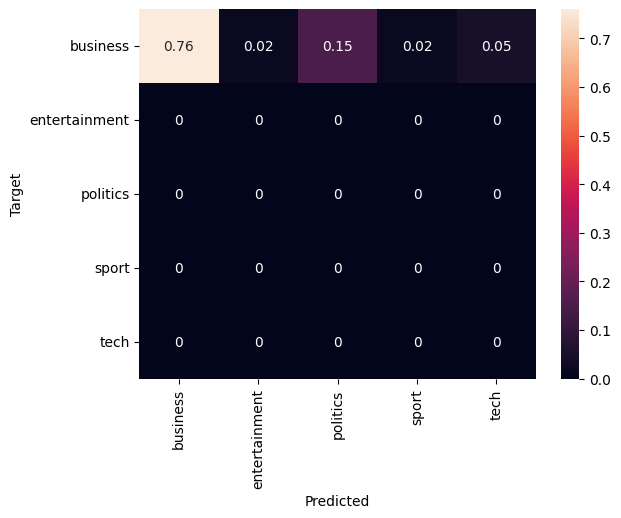

In [93]:
def plot_cm(cm):
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  ax = sn.heatmap(df_cm, annot=True, fmt='.2g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)


In [94]:
f1_score(df_small['labels'], predicted_labels, average='micro')

0.76